## Simulation engine

Here are some tutorials about overreact's simulation engine.

### Simple chemical kinetics

This tutorial addresses the most basic features of overreact in terms of
simulation. We will simulate a toy example: a simple first-order reaction with
known unitary reaction rate constant.

(We won't read any logfiles nor calculate any energy, but everything given here
also applies to calculated reaction rate constants.)

We are going to simulate the following simple scheme:

$$
\require{mhchem}
\ce{A ->[k_f] B}
$$

This reaction suggests the following set of equations:

$$
\begin{align*}
  \frac{dA}{dt} &= -k_f A\\
  \frac{dB}{dt} &=  k_f A
\end{align*}
$$

The above model translates to the following in overreact:

In [1]:
from overreact import api

scheme = api.parse_reactions("A -> B")

(Other tutorials dwelve into the returned object, but let's forget it for now.)

$k_f$ is going to be set as unity (inverse seconds).

In [2]:
kf = 1.0

overreact helps us to define the equations and solve the initial value problem.
First, let's define the system of ordinary differential equations:

In [3]:
import numpy as np
from overreact import simulate

dydt = simulate.get_dydt(scheme, np.array([kf]))

The returned object above is a function of concentrations and time that defines
a set of ordinary differential equations in time:

$$\frac{dy}{dt} = f(t, y)$$

We are going to simulate 10 seconds, starting with an initial concentration of
1 molar of A (the concentration units evidently depend on the units of the
reaction rate constant).

In [4]:
y, r = simulate.get_y(dydt, y0=[1., 0.])
t = np.linspace(y.t_min, 5.0)

The simulation data is stored in `t` (points in time) and `y` (concentrations).
In order to generate the graph shown at the beginning of the present tutorial,
we do the following:

Text(0, 0.5, 'Concentration (M)')

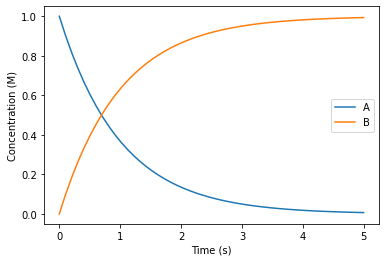

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(t, y(t)[0], label="A")
ax.plot(t, y(t)[1], label="B")
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration (M)")

Simple first-order reaction over time.

We can see that the reaction went to full completion by checking the final
concentrations:

In [6]:
y(y.t_max)

array([1.18704987e-18, 1.00000000e+00])